<a href="https://colab.research.google.com/github/AlejandroPSJ2/Data_Mining/blob/main/Clase2_clustering_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
#LIBRERIAS BASICAS

from google.colab import files
import io
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
%matplotlib inline

In [55]:
# FUNCIONES PARA CLUSTERING

def normalize(df):
    dfb = df.copy()
    for x in df.columns:
        dfb[x] = (df[x]-df[x].min())/(df[x].max()-df[x].min())
    return dfb   
    
def centroides(df):
    res = clusteres(df,kmeans.labels_)
    res = res.drop(columns=drop_list)
    res = res.groupby(['cluster']).mean()
    return res 

def clusteres(a,b): 
    lab = pd.DataFrame(data=b)
    ax = a.join(lab)
    ax.rename(columns={0:'cluster'},inplace=True)  
    return ax

def elbow(X):
    sum_of_squared_distances = []
    K = range(1,15)
    for k in K:
        k_means = KMeans(n_clusters=k)
        model = k_means.fit(X)
        sum_of_squared_distances.append(k_means.inertia_)

    plt.plot(K, sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('sum_of_squared_distances')
    plt.title('elbow method for optimal k')
    plt.show()
    return sum_of_squared_distances

def silhouette(X):
    sil = []
    K = range(2, 15)
    for k in K:
      kmeans = KMeans(n_clusters = k).fit(X)
      labels = kmeans.labels_
      sil.append(silhouette_score(X, labels, metric = 'euclidean'))

    plt.plot(K, sil, 'bx-')
    plt.xlabel('k')
    plt.ylabel('silhouette score')
    plt.title('silhouette method for optimal k')
    plt.show()
    return sil

In [48]:
#LOCAL DATA LOADING & PREVIEW

uploaded = files.upload()                                       ##Seleccionar archivo
df = pd.read_csv(io.BytesIO(uploaded['d1_diabetes.csv']))       ##dentro de los corchetes colocar el nombre del archivo original 
df.head()

Saving d1_diabetes.csv to d1_diabetes (5).csv


,ID,N_pregnant,Plasma,Diastolic_pressure,Triceps_thickness,Serum_insulin,BMI,Diabetes_function,Age,Diabetes_future
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [31]:
#ONLINE DATA LOADING & PREVIEW

url = 'https://raw.githubusercontent.com/AlejandroPSJ2/Data_Mining/main/clustering_data.csv'  #VERIFICAR BIEN LA RUTA DEL ARCHIVO
df = pd.read_csv(url,sep=';')
df.head()

,Cliente,Age,Recencia,Frecuencia,Valor
0,1,23,19,1,100
1,2,24,24,1,200
2,3,26,19,1,125
3,4,33,34,6,750
4,5,21,24,1,250


In [49]:
#DATA PREPARATION (VERY IMPORTANT TO DIFFERENTIATE "X" AND "DF")

drop_list = ['ID','Diabetes_future']    #ACA SE DEFINEN VARIABLES A ELIMINAR, SE PUEDEN AGREGAR ADICIONALES SEPARANDO CON COMA
X = df.drop(columns=drop_list)          
X = pd.get_dummies(X)                   #ONE HOT ENCODING SI HAY CATEGORICAS
X = normalize(X)                        #SE APLICA MIN-MAX

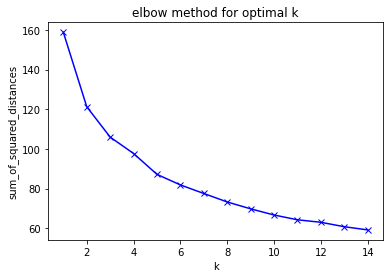

[158.79251085753106, 121.25790179991017, 105.96191463016736, 97.69271314432577, 87.17680583845771, 81.85429913067816, 77.54501015168009, 73.27460542253527, 69.80818163809697, 66.70481939664515, 64.28967072812694, 63.03192231163354, 60.802033417674316, 59.18844823351077]


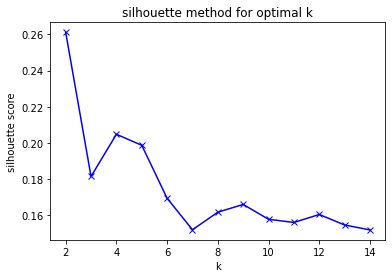

[0.26114611149614975, 0.1815110341488669, 0.2048057549090295, 0.19873872022244357, 0.16946258388331567, 0.15209973356729944, 0.16180953631349873, 0.16606919593434094, 0.15786543371580275, 0.1561353489479059, 0.16053164848745916, 0.1547199800200468, 0.1520127220419594]


In [50]:
# OPTIMAL NUMBER "K" OF CLUSTERS

print(elbow(X))
print(silhouette(X))

In [51]:
# ALGORITHM FIT

kmeans = KMeans(n_clusters=2, random_state=44).fit(X)   # SEÑALAR N_CLUSTERS SEGUN NUESTRA LECTURA DE METODO DE CODO Y SILUETA

In [56]:
# CLUSTER CENTROIDS   ### SE PUEDE OBVIAR

print('Centroides optimos de clusteres')
print(centroides(df))

Centroides optimos de clusteres
         N_pregnant      Plasma  Diastolic_pressure  Triceps_thickness  \
cluster                                                                  
0          2.083495  115.328155           65.990291          21.819417   
1          7.430830  132.225296           75.446640          17.924901   

         Serum_insulin        BMI  Diabetes_function        Age  
cluster                                                          
0            85.019417  31.775146           0.470783  26.772816  
1            69.173913  32.435178           0.474103  46.407115  


In [53]:
# CLUSTER RESULTS    ### SE PUEDE OBVIAR

print('Asignacion de clusteres segun cada observacion')
print(clusteres(df,kmeans.labels_).head())

Asignacion de clusteres segun cada observacion
   ID  N_pregnant  Plasma  Diastolic_pressure  Triceps_thickness  \
0   1           6     148                  72                 35   
1   2           1      85                  66                 29   
2   3           8     183                  64                  0   
3   4           1      89                  66                 23   
4   5           0     137                  40                 35   

   Serum_insulin   BMI  Diabetes_function  Age  Diabetes_future  cluster  
0              0  33.6              0.627   50                1        1  
1              0  26.6              0.351   31                0        0  
2              0  23.3              0.672   32                1        1  
3             94  28.1              0.167   21                0        0  
4            168  43.1              2.288   33                1        0  


In [57]:
# EXPORT RESULTS
centroides(df).to_csv('centroides.csv') 
files.download('centroides.csv')

clusteres(df,kmeans.labels_).to_csv('resultados.csv') 
files.download('resultados.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
# PREDICT VALUES

df_predict = X.head(5)    ##REEMPLAZAR "X.head(5)" POR OTRO DATASET, VER "LOCAL DATA LOADING & PREVIEW" OJO QUE DATA SE DEBE NORMALIZAR ANTES DE PREDECIR
new_labels = kmeans.predict(df_predict)    
print(new_labels)

[1 0 1 0 0]
